In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load the data
covid_data = pd.read_csv('covid-vaccination-vs-death_ratio.csv')
world_countries = pd.read_csv('countries of the world.csv')

In [29]:
# 6. Realizar un pre-procesamiento para filtrar los datos

# Clean the data
covid_data = covid_data.dropna()
world_countries = world_countries.dropna()

# Clean Covid data to delete the iso code
colums_to_delete_covid = ['iso_code']
covid_data = covid_data.drop(colums_to_delete_covid, axis=1)

# Clean World countries data to delete the columns that are not needed
colums_to_delete_world = ['Population', 'Area (sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Agriculture', 'Industry', 'Service']
world_countries = world_countries.drop(colums_to_delete_world, axis=1)

# Remove commas and convert to float
world_countries['Pop. Density (per sq. mi.)'] = world_countries['Pop. Density (per sq. mi.)'].str.replace(',', '').astype(float)
world_countries['Deathrate'] = world_countries['Deathrate'].str.replace(',', '.').astype(float)


In [30]:
# Sort and match values of the data
covid_data = covid_data.sort_values(by='country') # Sort covid_data by country
world_countries = world_countries.sort_values(by='Country') # Sort world_countries by country

In [31]:
# 5. Seleccionar variables de interés (por lo menos 5), modificar los nombres de las variables

covid_data = covid_data.rename(columns={'country': 'Country'}) # Rename column to match the other data
world_countries = world_countries.rename(columns={'Pop. Density (per sq. mi.)': 'Pop. Density', 'GDP ($ per capita)': 'GDP'}) # Rename column to match the other data
world_countries['Country'] = world_countries['Country'].str.strip()  # Remove white spaces from the country names for it to match
world_countries['Region'] = world_countries['Region'].str.strip()  # Remove white spaces from the region names for it to match

# Variables of interest: total_vaccinations, people_vaccinated, people_fully_vaccinated, New_deaths, ratio, GDP, death_rate, Pop. Density.

In [32]:
# Merge the data by countries in order to have regions and countries in the same dataframe
merged_data = pd.merge(covid_data, world_countries, on='Country') 
print(merged_data.head(10)) # Print the first 10 rows of the merged data to show the result of the merge

   Unnamed: 0      Country        date  total_vaccinations  people_vaccinated  \
0           0  Afghanistan  2021-05-11            504502.0           448878.0   
1          20  Afghanistan  2022-01-11           4925111.0          4378818.0   
2          21  Afghanistan  2022-01-13           4954809.0          4405897.0   
3          22  Afghanistan  2022-01-17           4985047.0          4432926.0   
4          23  Afghanistan  2022-01-19           5004050.0          4450211.0   
5          24  Afghanistan  2022-01-24           5046054.0          4486527.0   
6          25  Afghanistan  2022-01-26           5074196.0          4511372.0   
7          26  Afghanistan  2022-01-27           5081064.0          4517380.0   
8          27  Afghanistan  2022-01-31           5125146.0          4554648.0   
9          29  Afghanistan  2022-02-07           5216998.0          4634282.0   

   people_fully_vaccinated  New_deaths  population      ratio  \
0                  55624.0          12  403

In [33]:
# 4. Realizar visualizaciones iniciales

print(merged_data.iloc[0]) # Print the first row of the merged data to show the result of the merge and explain the columns
print(merged_data.head(10)) # Print the first 10 rows of the merged data to show the result of the merge
# Country: Name of the country
# Date: Date of the data
# Total_vaccinations: Total number of cases of covid-19 in the country to date
# People_vaccinated: Number of people vaccinated in the country to date
# People_fully_vaccinated: Number of people with all the vaccines in the country to date
# New_deaths: Number of new deaths because of covid in the country that date
# population: Population of the country
# Ratio: Ratio of people vaccinated to people dead in the country
# Region: Region of the country
# GDP: GDP of the country
# Pop. Density: Population density of the country
# Deathrate: Deathrate of the country 

Unnamed: 0                                    0
Country                             Afghanistan
date                                 2021-05-11
total_vaccinations                     504502.0
people_vaccinated                      448878.0
people_fully_vaccinated                 55624.0
New_deaths                                   12
population                           40374668.0
ratio                                  1.111781
Region                     ASIA (EX. NEAR EAST)
Pop. Density                              480.0
GDP                                       700.0
Deathrate                                 20.34
Name: 0, dtype: object
   Unnamed: 0      Country        date  total_vaccinations  people_vaccinated  \
0           0  Afghanistan  2021-05-11            504502.0           448878.0   
1          20  Afghanistan  2022-01-11           4925111.0          4378818.0   
2          21  Afghanistan  2022-01-13           4954809.0          4405897.0   
3          22  Afghanistan  2

In [34]:
# Separate latam countries and export the data
latam_countries = merged_data[merged_data['Region'] == 'LATIN AMER. & CARIB']
latam_countries.to_csv('latamCountriesVaccine.csv', index=False)

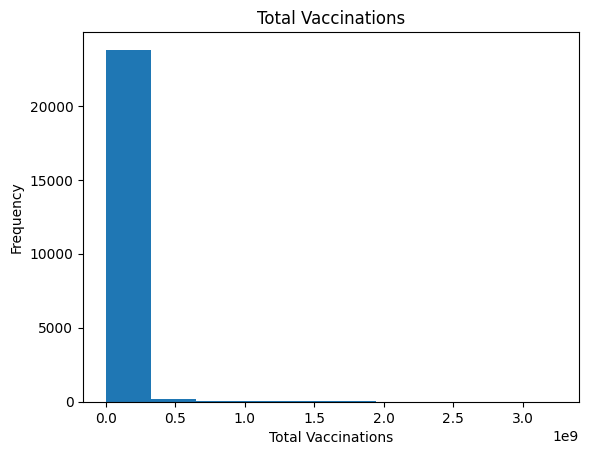

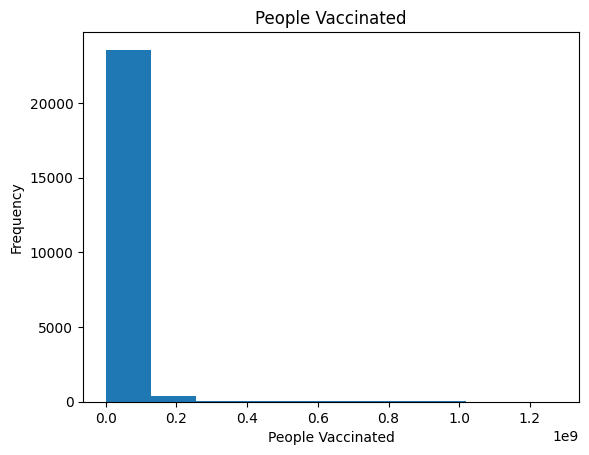

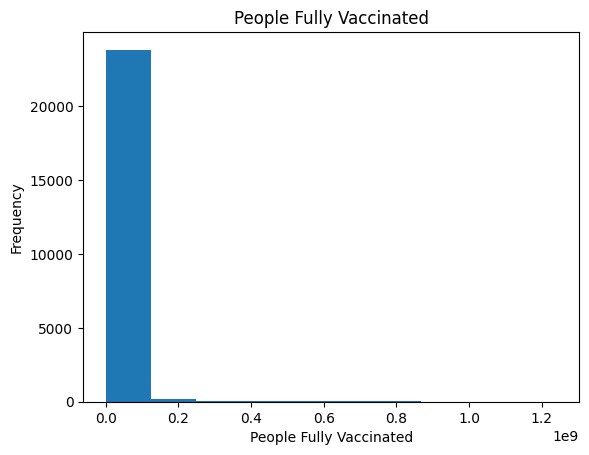

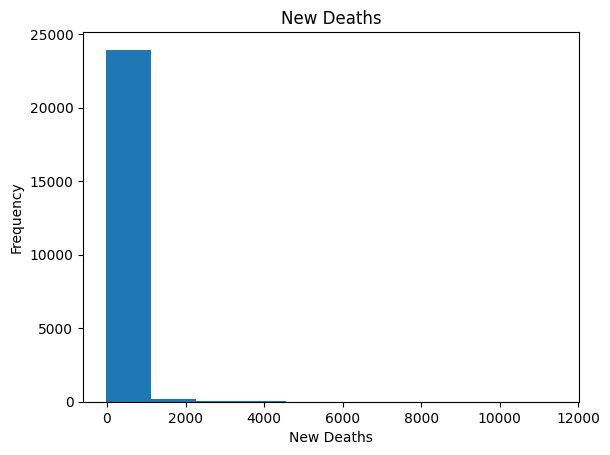

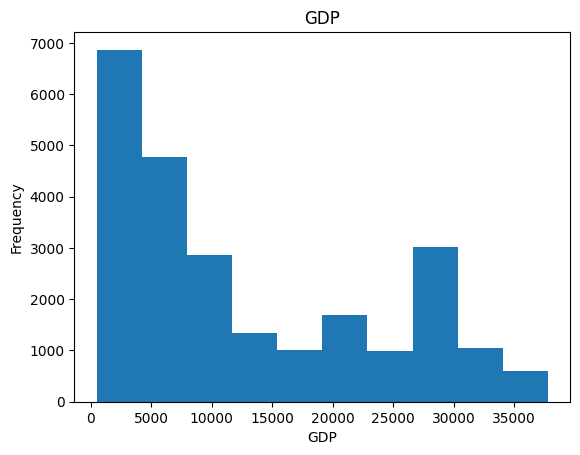

In [35]:
# 7. Utilizar histogramas para visualizar las distribuciones de las variables de interés

# Histogram of the total vaccinations
plt.hist(merged_data['total_vaccinations'], bins=10)
plt.title('Total Vaccinations')
plt.xlabel('Total Vaccinations')
plt.ylabel('Frequency')
plt.show()

# Histogram of the people vaccinated
plt.hist(merged_data['people_vaccinated'], bins=10)
plt.title('People Vaccinated')
plt.xlabel('People Vaccinated')
plt.ylabel('Frequency')
plt.show()

# Histogram of the people fully vaccinated
plt.hist(merged_data['people_fully_vaccinated'], bins=10)
plt.title('People Fully Vaccinated')
plt.xlabel('People Fully Vaccinated')
plt.ylabel('Frequency')
plt.show()

# Histogram of the new deaths
plt.hist(merged_data['New_deaths'], bins=10)
plt.title('New Deaths')
plt.xlabel('New Deaths')
plt.ylabel('Frequency') 
plt.show()

# Histogram of the GDP
plt.hist(merged_data['GDP'], bins=10)
plt.title('GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

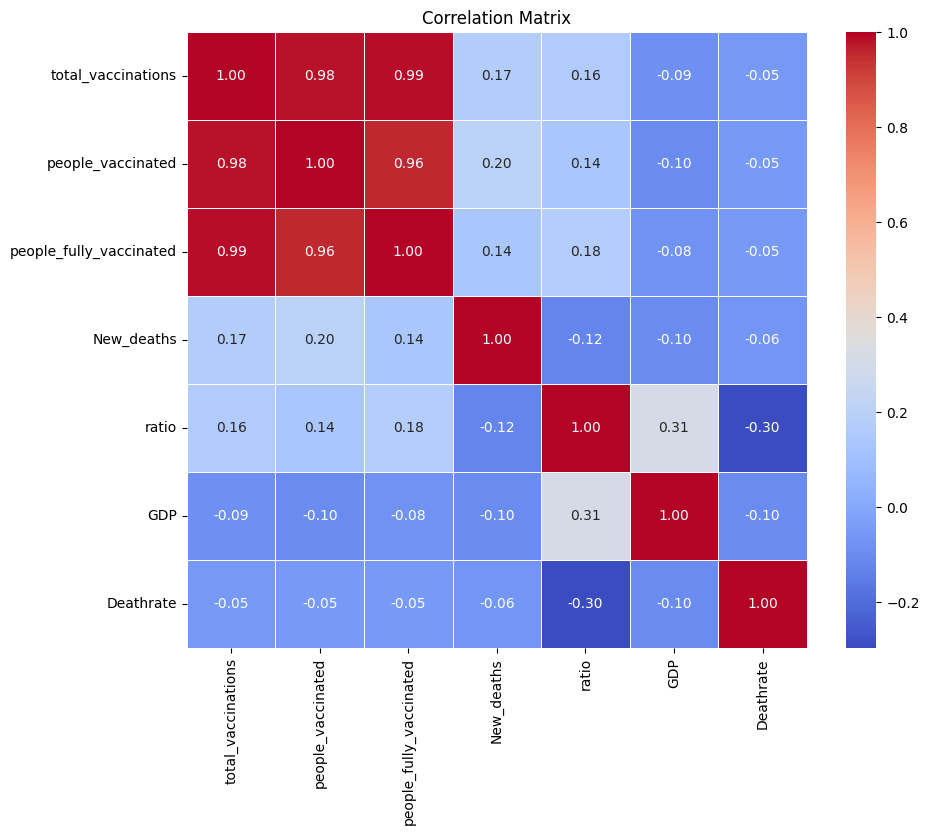

In [36]:
# 9. Obtener correlaciones entre las variables de interés para explorar cómo se relacionan

# Correlation between the variables of interest
correlation = merged_data[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'New_deaths', 'ratio', 'GDP', 'Deathrate']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# This image shows a correlation matrix, which is a tool used to determine the relationship between different variables. Each cell in the matrix represents the correlation coefficient between two variables. The correlation coefficient can range from -1 to 1, where:

#1 indicates a perfect positive correlation (as one variable increases, the other also increases), -1 indicates a perfect negative correlation (as one variable increases, the other decreases),0 indicates no correlation (the variables do not affect each other).In this specific correlation plot, various health and economic variables are considered:

# Total Vaccinations and People Vaccinated (0.98): This high positive correlation suggests that as the total number of vaccinations increase, the number of people vaccinated also tends to increase proportionally. 

# Total Vaccinations and GDP (0.09): This value suggests a very weak positive correlation between the total number of vaccinations and GDP, indicating that these parameters are not strongly linked.

# New Deaths and Death Rate (0.90): This strong positive correlation indicates that higher new deaths tend to associate with higher death rates.

# GDP and Death Rate (-0.09): This suggests a weak negative correlation, meaning that higher GDP might be very slightly associated with lower death rates, but the correlation is almost negligible.

# Total Vaccinations and Death Rate (-0.05) and People Vaccinated and Death Rate (-0.05): Both of these correlations are very weakly negative, suggesting almost no significant relationship between vaccination counts and the rate of deaths.

# Each row and column pairs different variables against each other to see how they are interrelated, with the diagonal from the top left to bottom right showing a perfect positive correlation (1.00) for every variable with itself. The color scale on the right helps visualize the strength of the correlation, with red representing stronger positive correlations and blue representing stronger negative correlations. The closer the absolute value of the coefficient is to 1, whether positive or negative, the stronger the correlation. Conversely, a color closer to white indicates a very weak or no correlation.

# This correlation chart is particularly useful for quickly scanning and identifying which metrics are strongly associated with each other, which is fundamental in statistical analysis for hypothesis testing, model building, and data exploration.